**DOG AND CAT IMAGE CLASSIFIER USING 3 ADVANCED IMAGE CLASSIFIER**

In [9]:
#IMPORTING THE NECESSARY LIBRARIES
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# LOADING THE CIFAR-10 DATASET
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [11]:
# CLASS NAME FOR CIFAR-10 DATASET (INDEX 3 AND 5 CORRESPOND TO CAT AND DOG)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [12]:
#FILTERING THE CAT (class 3) and DOG (class 5) IMAGES AND LABEL
cat_indices_train = np.where(train_labels == 3)[0]
dog_indices_train = np.where(train_labels == 5)[0]

cat_indices_test = np.where(test_labels == 3)[0]
dog_indices_test = np.where(test_labels == 5)[0]

cat_images_train = train_images[cat_indices_train]
dog_images_train = train_images[dog_indices_train]

cat_images_test = test_images[cat_indices_test]
dog_images_test = test_images[dog_indices_test]

In [14]:
#ASSIGNING LABELS FOR CAT (class 0) AND DOG (class 1)
cat_labels_train = np.zeros(cat_images_train.shape[0])
dog_labels_train = np.ones(dog_images_train.shape[0])

cat_labels_test = np.zeros(cat_images_test.shape[0])
dog_labels_test = np.ones(dog_images_test.shape[0])

In [16]:
#COMBINING DOG AND CAT DATA
X_train = np.concatenate([cat_images_train, dog_images_train], axis=0)
y_train = np.concatenate([cat_labels_train, dog_labels_train], axis=0)

X_test = np.concatenate([cat_images_test, dog_images_test], axis=0)
y_test = np.concatenate([cat_labels_test, dog_labels_test], axis=0)

In [18]:
#NORMALIZE PIXEL VALUES BETWEEN 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [19]:
#CONVERTING LABELS TO CATEGORICAL
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

In [22]:
#DEFINING AND TRAINING BASIC CNN
model1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model1.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/5
313/313 [==============================] - 13s 39ms/step - loss: 0.6932 - accuracy: 0.4929 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
313/313 [==============================] - 13s 40ms/step - loss: 0.6932 - accuracy: 0.4970 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
313/313 [==============================] - 13s 40ms/step - loss: 0.6932 - accuracy: 0.4930 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
313/313 [==============================] - 13s 43ms/step - loss: 0.6932 - accuracy: 0.4972 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
313/313 [==============================] - 12s 40ms/step - loss: 0.6932 - accuracy: 0.4990 - val_loss: 0.6931 - val_accuracy: 0.5000


In [26]:
#EVALUATING AND PRINTING THE ACCURACY OF CNN
loss_cnn, accuracy_cnn = model1.evaluate(X_test, y_test)
print("CNN Test Accuracy:", accuracy_cnn)

63/63 [==============================] - 1s 13ms/step - loss: 0.6931 - accuracy: 0.5000
CNN Test Accuracy: 0.5


In [23]:
#DEFINING AND TRAINING VGG16
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

model2 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model2.layers[0].trainable = False  # Freeze VGG-16 base layers

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model2.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/5
313/313 [==============================] - 161s 509ms/step - loss: 0.7023 - accuracy: 0.5038 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 2/5
313/313 [==============================] - 166s 532ms/step - loss: 0.6940 - accuracy: 0.4932 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
313/313 [==============================] - 159s 510ms/step - loss: 0.6933 - accuracy: 0.4933 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
313/313 [==============================] - 145s 462ms/step - loss: 0.6932 - accuracy: 0.4879 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
313/313 [==============================] - 168s 537ms/step - loss: 0.6932 - accuracy: 0.4944 - val_loss: 0.6931 - val_accuracy: 0.5000


In [27]:
#EVALUATING AND PRINTING THE ACCURACY OF VGG
loss_vgg, accuracy_vgg = model2.evaluate(X_test, y_test)
print("VGG Test Accuracy:", accuracy_vgg)

63/63 [==============================] - 24s 380ms/step - loss: 0.6931 - accuracy: 0.5000
VGG Test Accuracy: 0.5


In [28]:
#DEFINING AND TRAINING RESNET-50
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

model3 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model3.layers[0].trainable = False  # Freeze ResNet-50 base layers

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model3.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))


94765736/94765736 [==============================] - 4s 0us/step
Epoch 1/5
313/313 [==============================] - 69s 207ms/step - loss: 0.7164 - accuracy: 0.5015 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
313/313 [==============================] - 52s 165ms/step - loss: 0.6932 - accuracy: 0.4976 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
313/313 [==============================] - 62s 198ms/step - loss: 0.6932 - accuracy: 0.4970 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
313/313 [==============================] - 53s 170ms/step - loss: 0.6932 - accuracy: 0.4994 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
313/313 [==============================] - 54s 172ms/step - loss: 0.6932 - accuracy: 0.4964 - val_loss: 0.6931 - val_accuracy: 0.5000


In [29]:
#EVALUATING AND PRINTING THE ACCURACY OF RESNET-50
loss_res, accuracy_res = model3.evaluate(X_test, y_test)
print("RESNET-50 Test Accuracy:", accuracy_res)

63/63 [==============================] - 9s 142ms/step - loss: 0.6931 - accuracy: 0.5000
RESNET-50 Test Accuracy: 0.5


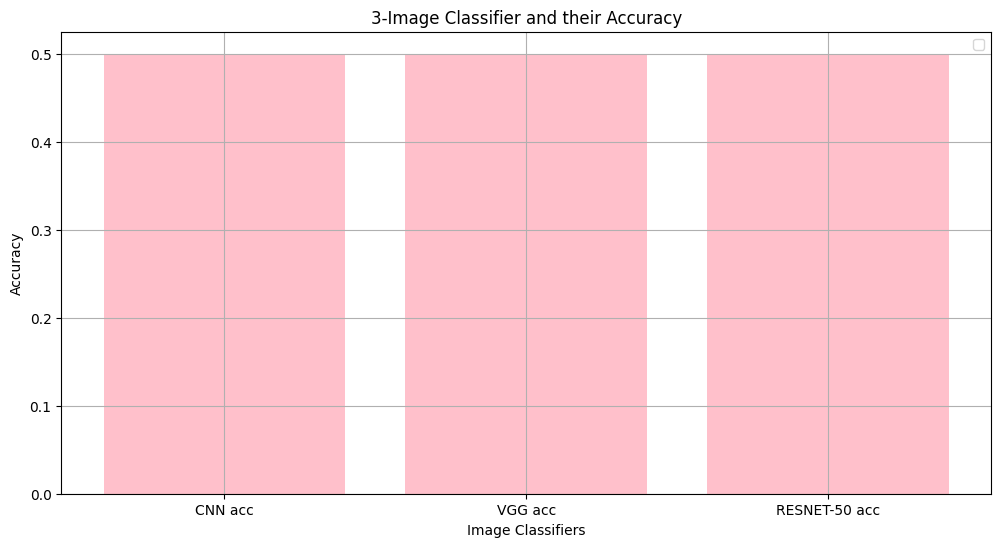

In [37]:
#DATA VISUALIZATION
#PLOTTING BAR PLOT FOR 3 MODEL ACCURACIES
plt.figure(figsize=(12, 6))
x=['CNN acc','VGG acc','RESNET-50 acc']
y=[0.5,0.5,0.5]
plt.bar(x,y,color='pink')

plt.title('3-Image Classifier and their Accuracy')
plt.xlabel('Image Classifiers')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

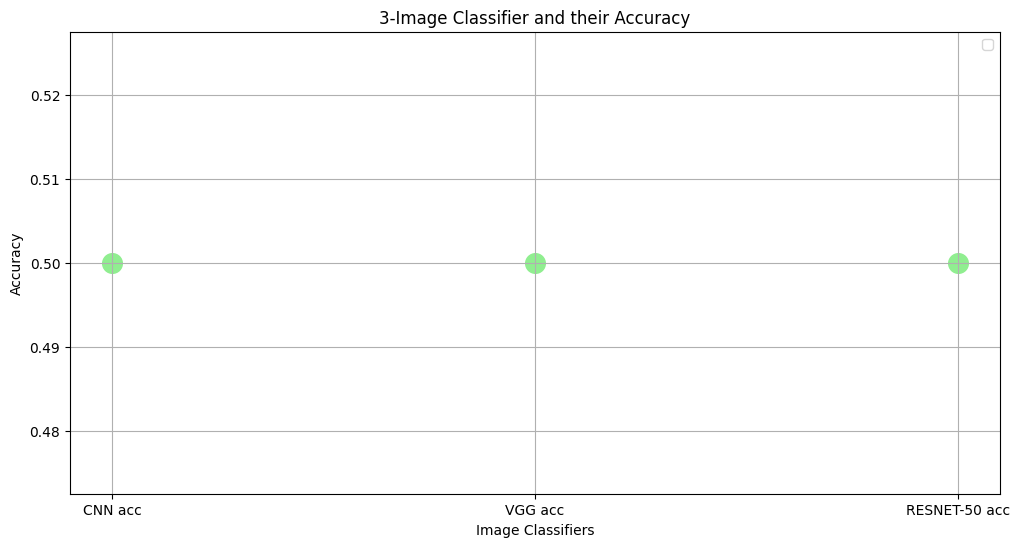

In [39]:
#PLOTTING SCATTER PLT FOR 3 MODEL ACCURACIES
plt.figure(figsize=(12, 6))
x=['CNN acc','VGG acc','RESNET-50 acc']
y=[0.5,0.5,0.5]
plt.scatter(x,y,color='lightgreen',s=200)

plt.title('3-Image Classifier and their Accuracy')
plt.xlabel('Image Classifiers')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()